In [1]:
#EDA Exploratory Data Analysis using titanic dataset from kaggle 
'importing required libraries'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

In [2]:
'''The Data-
reading the data into data frame work'''
titanic = pd.read_csv('tested.csv')
print(titanic)


     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
#finding missing data
titanic.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False   True     False  
2    False   True     False  
3    False   True     False  
4    False   True     False  
..     ...    ...       ...  
413  False   True     False  
414  False  False     False  
415  False   True     False  
416  False   True     False  
417  False   True     False  

[418 rows x 12 columns]

<AxesSubplot:>

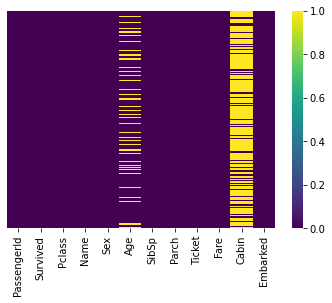

In [4]:
#Used seaborn to create a simple heatmap to see where we are missing data
seaborn.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

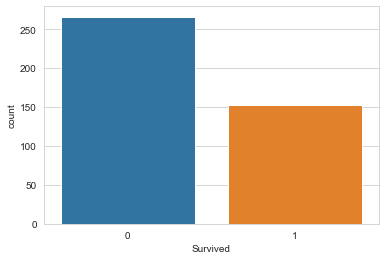

In [5]:
'''20 percent of the Age data is missing
 visualizing some more of the data
used set_style to set the background style 
countplot to give a count of rows in a particular column '''
seaborn.set_style('whitegrid')
seaborn.countplot(x='Survived',data=titanic)


<AxesSubplot:xlabel='Survived', ylabel='count'>

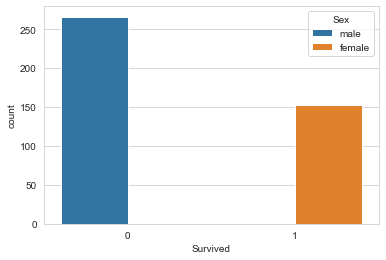

In [6]:
''' hue parameter determines which column in the data frame should be used for colour encoding'''
seaborn.set_style('whitegrid')
seaborn.countplot(x='Survived',hue='Sex',data=titanic)


In [7]:
#used to find number of rows and columns
titanic.shape

(418, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

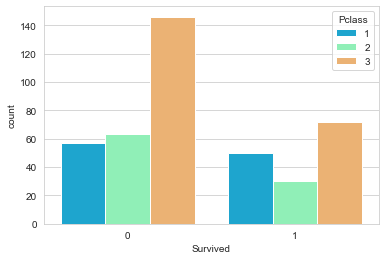

In [8]:
'used pakette here'
seaborn.set_style('whitegrid')
seaborn.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

C:\Users\vyshu\anaconda3\Anacondan\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

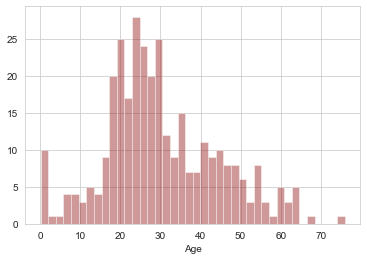

In [9]:
#histogram using seaborn , kde-kernal desity estimation=false it will give a histogram'
seaborn.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

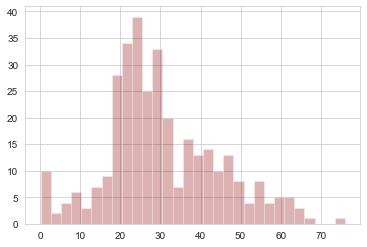

In [10]:
'histrogram using mat.lib'
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

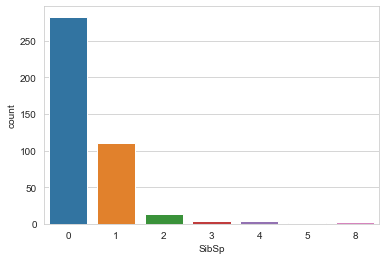

In [11]:
'finding sibling and spouse count'
seaborn.countplot(x='SibSp',data=titanic)

<AxesSubplot:>

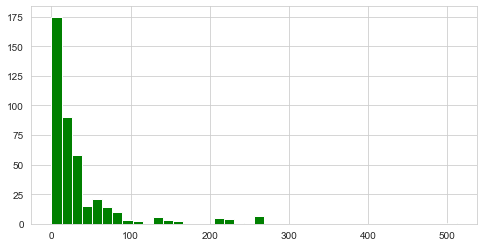

In [12]:
'histogram for the fare '
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

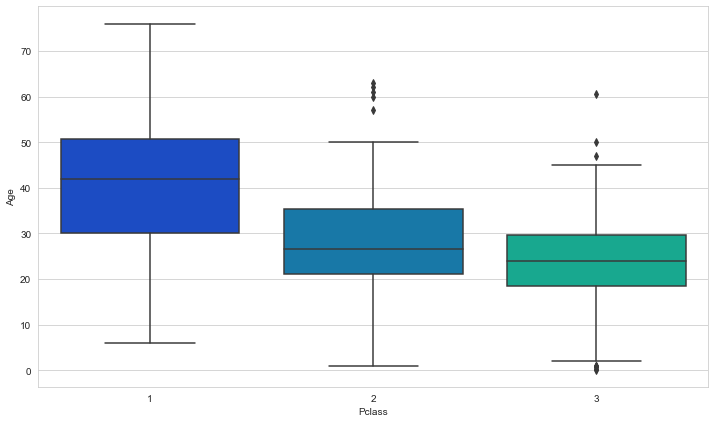

In [13]:
#Data Cleaning
''' fill in missing age data instead of just dropping the missing age data rows.
  by using this we can find the average age of people of passenger class'''

plt.figure(figsize=(12, 7))
seaborn.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')





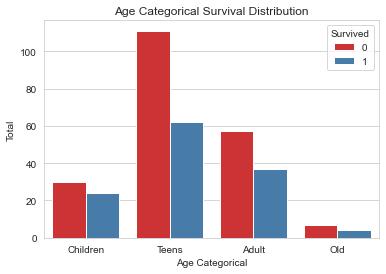

In [14]:
'''We can see the wealthier passengers in the higher classes tend to be older, which makes sense.
We'll use these average age values to impute based on Pclass for Age.'''
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
titanic['Age'] = pd.cut(titanic.Age, interval, labels = categories)

ax = seaborn.countplot(x = 'Age',  data =titanic, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [16]:
'apply the function'
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

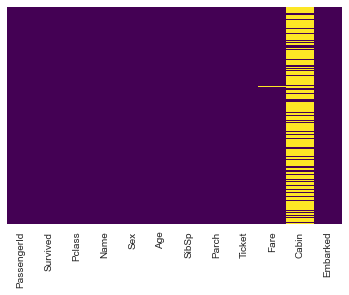

In [17]:
'checking using heatmap'
seaborn.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
#droping the Cabin column
titanic.drop('Cabin',axis=1,inplace=True)

In [19]:
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex    Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  Teens      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  Adult      1      0   
2                     Myles, Mr. Thomas Francis    male    Old      0      0   
3                              Wirz, Mr. Albert    male  Teens      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  Teens      1      1   

    Ticket     Fare Embarked  
0   330911   7.8292        Q  
1   363272   7.0000        S  
2   240276   9.6875        Q  
3   315154   8.6625        S  
4  3101298  12.2875        S

<AxesSubplot:>

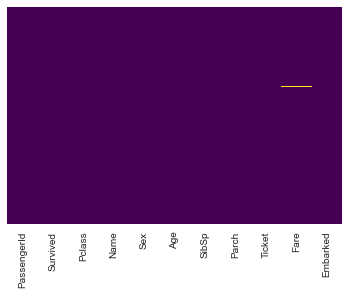

In [20]:
'checking using heatmap'
seaborn.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
titanic.dropna(inplace=True)

<AxesSubplot:>

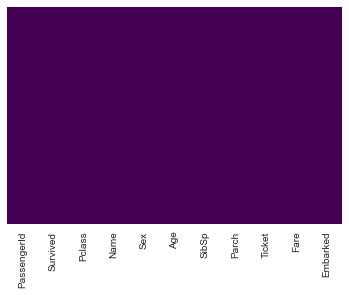

In [22]:
'checking using heatmap'
seaborn.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
#Converting Categorical Features
#convert categorical features to dummy variables using pandas
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

Q  S
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1

In [24]:
#converting the categorical values embarked , sex wich are male and female to integers for better data analysin '
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
#droing the other Nan values 
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [25]:
titanic.head()

PassengerId  Survived  Pclass    Age  SibSp  Parch     Fare
0          892         0       3  Teens      0      0   7.8292
1          893         1       3  Adult      1      0   7.0000
2          894         0       2    Old      0      0   9.6875
3          895         0       3  Teens      0      0   8.6625
4          896         1       3  Teens      1      1  12.2875

In [26]:
#adding the changed categorical values '
titanic = pd.concat([titanic,sex,embark],axis=1)

In [27]:
titanic.head()

PassengerId  Survived  Pclass    Age  SibSp  Parch     Fare  male  Q  S
0          892         0       3  Teens      0      0   7.8292     1  1  0
1          893         1       3  Adult      1      0   7.0000     0  0  1
2          894         0       2    Old      0      0   9.6875     1  1  0
3          895         0       3  Teens      0      0   8.6625     1  0  1
4          896         1       3  Teens      1      1  12.2875     0  0  1

In [ ]:
#data is clean now ready for Logistic Regression modeling Thank You 